In [1]:
import bioread
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
project_dir = os.getcwd().split('\\')[:-1]
project_dir = '\\'.join(project_dir)

In [ ]:
video_dir = project_dir + "\\data\\raw\\Video\\raw"
video_files = os.listdir(video_dir)
pps = [int(file[4:7]) for file in video_files]

In [ ]:
acq_files = [f'{project_dir}\\data\\raw\\Physiological\\raw\\Biopac\\pp{pp}s2.acq' for pp in pps]
acq_file = acq_files[5]

In [ ]:
biodata = bioread.read_file(acq_file)

In [ ]:
biodata.channels

In [ ]:
plt.plot(biodata.channels[0].time_index[:3000*2000], biodata.channels[0].data[:3000*2000])
plt.title('Raw EDA Signal')

In [ ]:
plt.plot(biodata.channels[2].time_index[:3000*2000], biodata.channels[2].data[:3000*2000])
plt.title('Different components of the study')

In [ ]:
for i in range(3):
    plt.plot(biodata.channels[i].time_index, biodata.channels[i].data)
    plt.legend()

In [ ]:
df=np.copy(biodata.channels[2].data)

In [ ]:
starts = np.where(np.diff(df)>4)[0] # Wanneer die aan springt

In [ ]:
stops = np.where(np.diff(df)<0)[0] # Wanneer die uitspringt

In [ ]:
start = starts[4]
stop = stops[5]

In [ ]:
import neurokit2 as nk

In [ ]:
plt.rcParams['figure.figsize'] = [15, 5]  # Bigger images

In [ ]:
eda_channel = biodata.channels[0]

In [ ]:
eda_signal = eda_channel.data[start:stop]

In [ ]:
signals, info = nk.eda_process(eda_signal, sampling_rate=2000)

In [54]:
cleaned = signals["EDA_Clean"]
features = [info["SCR_Onsets"], info["SCR_Peaks"], info["SCR_Recovery"]]

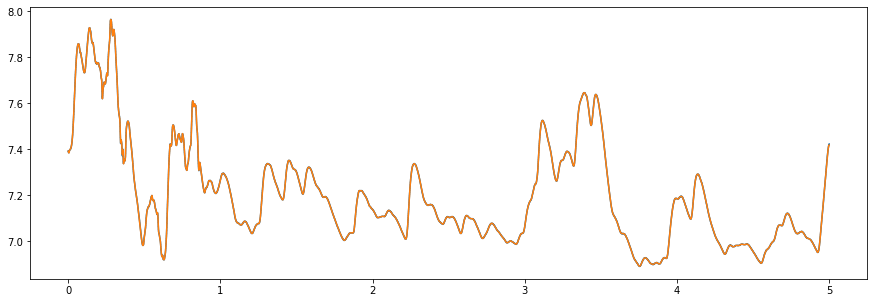

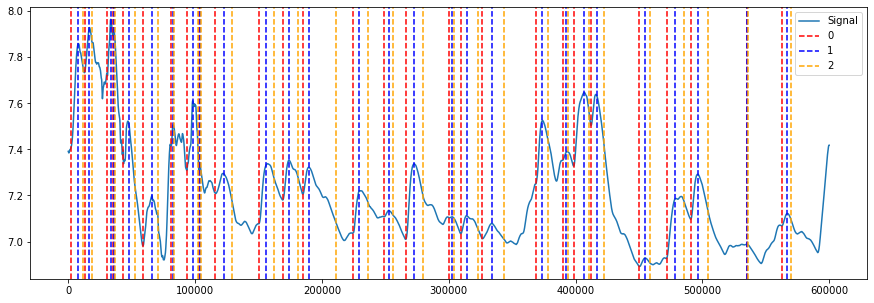

In [55]:
x = np.array(range(0, stop-start))/2000/60
plt.plot(x, eda_signal)
plt.plot(x, cleaned)
plot = nk.events_plot(features, cleaned, color=['red', 'blue', 'orange'])

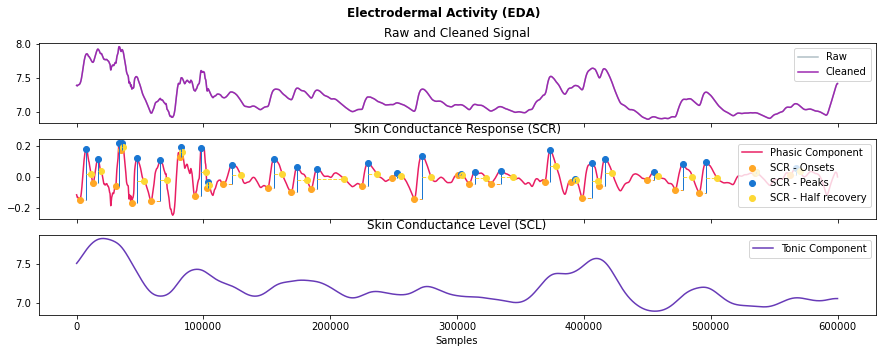

In [56]:
plot = nk.eda_plot(signals)

In [58]:
ecg_signal = biodata.channels[1].data[start:stop]
ecg_signal
signals, info = nk.ecg_process(ecg_signal, sampling_rate=2000)

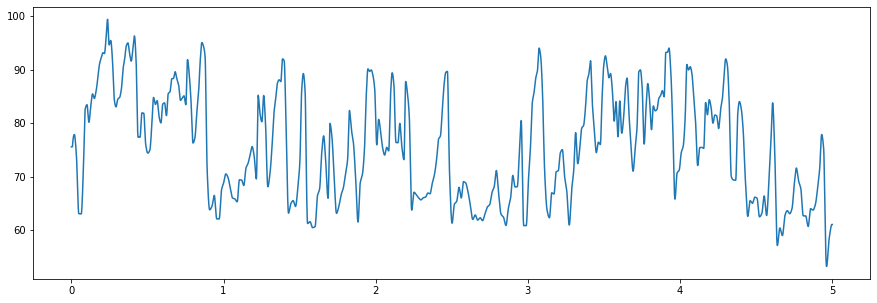

In [59]:
plt.plot(x, signals['ECG_Rate'])

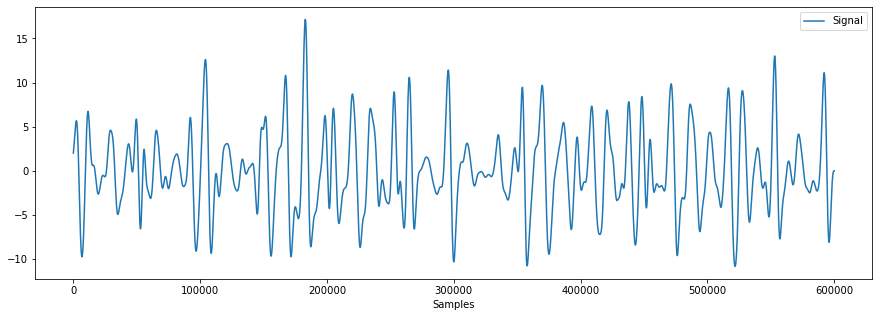

In [63]:
edr = nk.ecg_rsp(ecg_rate, sampling_rate=2000)
# Visual comparison
nk.signal_plot(edr)

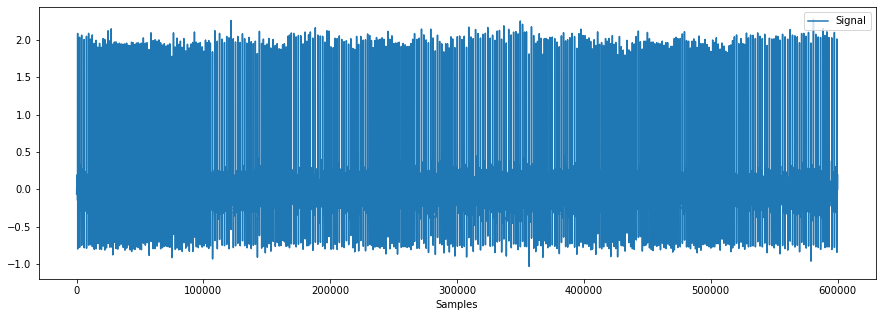

In [61]:
nk.signal_plot(ecg_signal)

In [62]:
# Extract peaks
rpeaks, info = nk.ecg_peaks(ecg_signal, sampling_rate=2000)
# Compute rate
ecg_rate = nk.ecg_rate(rpeaks, sampling_rate=2000, desired_length=len(ecg_signal))